# MOVIE RECOMMENDATION SYSTEM

# Importing Libraries

In [30]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
movies=pd.read_csv(r"C:\Users\FATHIMA SHEMEEMA\Desktop\movie.csv")

In [32]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [33]:
ratings=pd.read_csv(r"C:\Users\FATHIMA SHEMEEMA\Desktop\rating.csv")

In [34]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,02-04-2005 23:53
1,1,29,3.5,02-04-2005 23:31
2,1,32,3.5,02-04-2005 23:33
3,1,47,3.5,02-04-2005 23:32
4,1,50,3.5,02-04-2005 23:29


In [35]:
final_dataset=ratings.pivot(index="movieId",columns="userId",values="rating")
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,4.0,NaN,NaN,5.0,NaN,4.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,5.0,4.5
2,3.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
3,NaN,4.0,NaN,NaN,NaN,3.0,3.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,3.5,NaN,NaN,NaN,NaN


In [36]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,5.0,4.5
2,3.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,0.0,4.0,0.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,3.5,0.0,0.0,0.0,0.0


# Visualization

In [37]:
no_user_voted=ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted=ratings.groupby('userId')['rating'].agg('count')

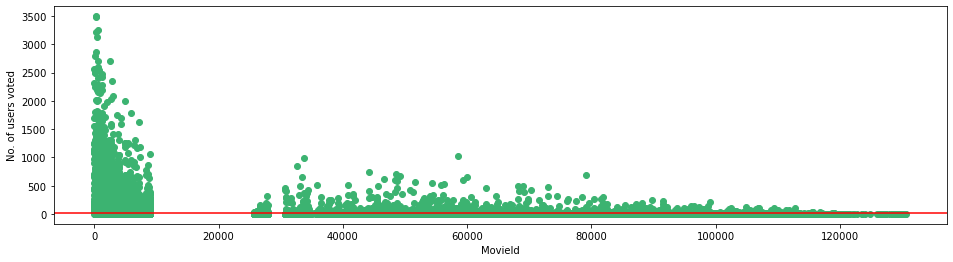

In [38]:
f,ax=plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [39]:
final_dataset=final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]


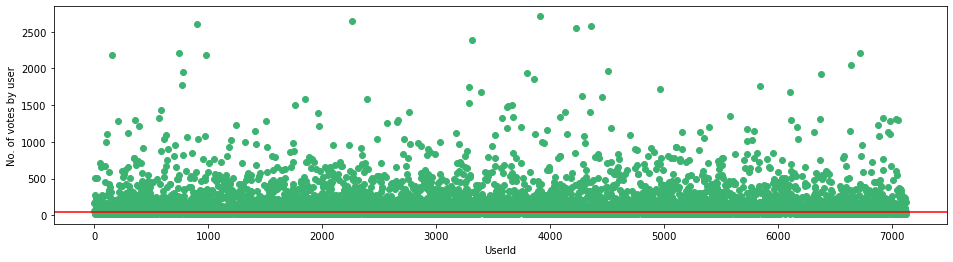

In [40]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [41]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted >50].index]
final_dataset

userId,1,2,3,5,7,8,11,13,14,16,...,7104,7105,7106,7107,7110,7111,7113,7115,7116,7117
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,4.0,4.5,4.0,4.5,3.0,...,5.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,4.0
2,3.5,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
3,0.0,4.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Removing sparsity

In [42]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [43]:
csr_sample=csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [44]:
csr_data=csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

# Making the movie recommendation system model

In [45]:
knn=NearestNeighbors(metric='cosine',algorithm='brute',n_neighbors=20,n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

# Making the recommendation function

In [46]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df

# Let’s Recommend some movies!

In [47]:
get_movie_recommendation('Iron Man')

,Title,Distance
1,Watchmen (2009),0.451344
2,Iron Man 2 (2010),0.438878
3,V for Vendetta (2006),0.433627
4,Batman Begins (2005),0.425012
5,"Bourne Ultimatum, The (2007)",0.418798
6,Avatar (2009),0.414039
7,300 (2007),0.401727
8,WALL·E (2008),0.384598
9,Star Trek (2009),0.355454
10,"Dark Knight, The (2008)",0.318087


In [48]:
get_movie_recommendation('Memento')

,Title,Distance
1,"Lord of the Rings: The Return of the King, The...",0.403959
2,Kill Bill: Vol. 1 (2003),0.400631
3,Minority Report (2002),0.399747
4,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",0.394931
5,"Lord of the Rings: The Two Towers, The (2002)",0.389132
6,American Beauty (1999),0.377393
7,"Matrix, The (1999)",0.364115
8,"Lord of the Rings: The Fellowship of the Ring,...",0.356694
9,Eternal Sunshine of the Spotless Mind (2004),0.352697
10,Fight Club (1999),0.309538
